In [1]:
import pandas as pd
import numpy as np

import openmatrix as omx

In [2]:
# git clone https://github.com/bstabler/TransportationNetworks.git
# copy the Sioux Falls folder to the current directory

_prefix = "./SiouxFalls/SiouxFalls"


In [3]:
# CSV Data (using nodes from csv gives a better looking network)
# node_df = pd.read_csv(f"{_prefix}_node.csv")
# net_df = pd.read_csv(f"{_prefix}_net.csv")
# od_df = pd.read_csv(f"{_prefix}_od.csv")

In [4]:
node_df = pd.read_csv(f"{_prefix}_node.tntp", sep="\t")
node_df.drop([';'], axis=1, inplace=True)
node_df

,Node,X,Y
0,1,-96.770420,43.612828
1,2,-96.711251,43.605813
2,3,-96.774303,43.572962
3,4,-96.747168,43.563654
4,5,-96.731569,43.564034
5,6,-96.711644,43.587586
6,7,-96.693423,43.563844
7,8,-96.711382,43.562324
8,9,-96.731241,43.548596
9,10,-96.731438,43.545271


In [5]:
# network
net_df = pd.read_csv(f"{_prefix}_net.tntp", skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net_df.columns]
net_df.columns = trimmed
net_df.drop(['~', ';'], axis=1, inplace=True) # And drop the silly first and last columns

net_df

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,2,25900.200640,6,6,0.15,4,0,0,1
1,1,3,23403.473190,4,4,0.15,4,0,0,1
2,2,1,25900.200640,6,6,0.15,4,0,0,1
3,2,6,4958.180928,5,5,0.15,4,0,0,1
4,3,1,23403.473190,4,4,0.15,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
71,23,22,5000.000000,4,4,0.15,4,0,0,1
72,23,24,5078.508436,2,2,0.15,4,0,0,1
73,24,13,5091.256152,4,4,0.15,4,0,0,1
74,24,21,4885.357564,3,3,0.15,4,0,0,1


In [6]:
def import_matrix(matfile):
    f = open(matfile, 'r')
    all_rows = f.read()
    blocks = all_rows.split('Origin')[1:]
    matrix = {}
    for k in range(len(blocks)):
        orig = blocks[k].split('\n')
        dests = orig[1:]
        orig=int(orig[0])

        d = [eval('{'+a.replace(';',',').replace(' ','') +'}') for a in dests]
        destinations = {}
        for i in d:
            destinations = {**destinations, **i}
        matrix[orig] = destinations
    return matrix

trips_dict = import_matrix(f"{_prefix}_trips.tntp")

od_df = pd.DataFrame(trips_dict)

od_df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.0,100.0,100.0,500.0,200.0,300.0,500.0,800.0,500.0,1300.0,...,500.0,500.0,400.0,100.0,300.0,300.0,100.0,400.0,300.0,100.0
2,100.0,0.0,100.0,200.0,100.0,400.0,200.0,400.0,200.0,600.0,...,100.0,400.0,200.0,0.0,100.0,100.0,0.0,100.0,0.0,0.0
3,100.0,100.0,0.0,200.0,100.0,300.0,100.0,200.0,100.0,300.0,...,100.0,200.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0
4,500.0,200.0,200.0,0.0,500.0,400.0,400.0,700.0,700.0,1200.0,...,500.0,800.0,500.0,100.0,200.0,300.0,200.0,400.0,500.0,200.0
5,200.0,100.0,100.0,500.0,0.0,200.0,200.0,500.0,800.0,1000.0,...,200.0,500.0,200.0,0.0,100.0,100.0,100.0,200.0,100.0,0.0
6,300.0,400.0,300.0,400.0,200.0,0.0,400.0,800.0,400.0,800.0,...,200.0,900.0,500.0,100.0,200.0,300.0,100.0,200.0,100.0,100.0
7,500.0,200.0,100.0,400.0,200.0,400.0,0.0,1000.0,600.0,1900.0,...,500.0,1400.0,1000.0,200.0,400.0,500.0,200.0,500.0,200.0,100.0
8,800.0,400.0,200.0,700.0,500.0,800.0,1000.0,0.0,800.0,1600.0,...,600.0,2200.0,1400.0,300.0,700.0,900.0,400.0,500.0,300.0,200.0
9,500.0,200.0,100.0,700.0,800.0,400.0,600.0,800.0,0.0,2800.0,...,1000.0,1400.0,900.0,200.0,400.0,600.0,300.0,700.0,500.0,200.0
10,1300.0,600.0,300.0,1200.0,1000.0,800.0,1900.0,1600.0,2800.0,0.0,...,4000.0,4400.0,3900.0,700.0,1800.0,2500.0,1200.0,2600.0,1800.0,800.0


In [7]:
print(f"Number of nodes: {len(node_df)}")
print(f"Number of edges: {len(net_df)}")
print(f"Number of OD pairs: {len(od_df)}")

Number of nodes: 24
Number of edges: 76
Number of OD pairs: 24


## Simplify the problem

### Option 1: Remove nodes

comment the next cell to keep all nodes

In [8]:
nodes_to_ignore = [0, 1, 2, 6, 11, 12, 17] # 0-indexed
_nodes_to_ignore = [node + 1 for node in nodes_to_ignore] # 1-indexed

all_ = list(range(len(node_df))) # 0-indexed
nodes_to_keep = list(set(all_) - set(nodes_to_ignore)) # 0-indexed
_nodes_to_keep = [node + 1 for node in nodes_to_keep] # 1-indexed
mapping = {node: int(i + 1) for i, node in enumerate(_nodes_to_keep)} # 1-indexed

# remove the nodes from the node_df
node_df = node_df[~node_df["Node"].isin(_nodes_to_ignore)]
# reindex the Node column
node_df = node_df.reset_index(drop=True)
node_df["Node"] = np.arange(len(node_df)) + 1

# remove the nodes from the net_df
net_df = net_df[~net_df["init_node"].isin(_nodes_to_ignore)]
net_df = net_df[~net_df["term_node"].isin(_nodes_to_ignore)]
# reindex the A and B columns using the mapping
net_df["init_node"] = net_df["init_node"].map(mapping)
net_df["term_node"] = net_df["term_node"].map(mapping)
# reindex the LINK column
net_df = net_df.reset_index(drop=True)
net_df["LINK"] = np.arange(len(net_df))

# remove columns from the od_df
od_df = od_df.drop(_nodes_to_ignore, axis=0)
od_df = od_df.drop(_nodes_to_ignore, axis=1)
# reindex the columns using the mapping
od_df = od_df.rename(columns=mapping, index=mapping)

In [9]:
node_df

,Node,X,Y
0,1,-96.747168,43.563654
1,2,-96.731569,43.564034
2,3,-96.711644,43.587586
3,4,-96.711382,43.562324
4,5,-96.731241,43.548596
5,6,-96.731438,43.545271
6,7,-96.746841,43.544131
7,8,-96.751035,43.529306
8,9,-96.731504,43.529401
9,10,-96.711382,43.546744


### Option 2: Remove trips

comment the next cell to keep all trips

In [10]:
def create_sparse_od_matrix(matrix, num_trips):

    sparse = np.zeros_like(matrix)

    # set num_trips non-zero values at random non-diagonal positions
    num_trips_count = 0
    while num_trips_count <= num_trips:

        # randomly select a row and column
        i, j = np.random.randint(0, len(matrix), 2)

        # Ensure we are not on the diagonal and the position is still zero
        if i != j and sparse[i, j] == 0 and matrix[i, j] != 0:
            sparse[i, j] = matrix[i, j]
            num_trips_count += 1

    return sparse

od_matrix = np.array(od_df)

total_trips = 100 # number of non-zero values to keep
od_matrix = create_sparse_od_matrix(od_matrix, total_trips)

od_df = pd.DataFrame(od_matrix, index=od_df.index, columns=od_df.columns)

od_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0.0,500.0,0.0,0.0,700.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,300.0,200.0,0.0,0.0,200.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,200.0,100.0,0.0,0.0,0.0,0.0,0.0
3,0.0,200.0,0.0,0.0,0.0,800.0,400.0,0.0,0.0,900.0,500.0,0.0,0.0,0.0,0.0,0.0,100.0
4,0.0,0.0,800.0,0.0,0.0,0.0,800.0,400.0,600.0,0.0,1400.0,700.0,0.0,0.0,0.0,0.0,200.0
5,0.0,800.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,500.0,0.0
6,0.0,1000.0,800.0,1600.0,2800.0,0.0,3900.0,0.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1800.0,0.0
7,1400.0,500.0,0.0,0.0,1400.0,0.0,0.0,1600.0,1400.0,1400.0,1000.0,0.0,0.0,0.0,0.0,1300.0,600.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,0.0,0.0,0.0,0.0,0.0,0.0
9,500.0,0.0,200.0,600.0,900.0,0.0,0.0,1300.0,0.0,0.0,1500.0,0.0,1100.0,800.0,2600.0,1000.0,0.0
10,0.0,500.0,0.0,2200.0,1400.0,0.0,0.0,0.0,1200.0,0.0,0.0,1300.0,0.0,0.0,0.0,0.0,0.0


In [11]:
topology = {}

topology['graph'] = {'directed': True,
                    'type': "list",
                    'nodes': [], 
                    'edges': []}

# nodes
for index, row in node_df.iterrows():
    id = index
    # (using nodes from csv gives a better looking network)
    # position_x = int(row["X"])
    # position_y = int(row["Y"])
    position_x = row["X"].item()
    position_y = row["Y"].item()
    _x = {'id': id, 'position_x': position_x, 'position_y': position_y}
    topology['graph']['nodes'].append(_x)

# edges
for index, row in net_df.iterrows():
    id = index
    source = int(row["init_node"]) - 1
    target = int(row["term_node"]) - 1
    r = {'id': id, 'source': source, 'target': target, 'distance': 1}
    topology['graph']['edges'].append(r)

# segments
topology['segments'] = {"type": "list", 
                        "list": []}

for index, row in net_df.iterrows():
    source = int(row["init_node"]) - 1
    target = int(row["term_node"]) - 1
    capacity = row["capacity"].item()
    travel_time = row["free_flow_time"].item()
    s = {'source': source, 'target': target, 'travel_time': travel_time, 'capacity': capacity, 'position_x': None, 'position_y': None}
    topology['segments']['list'].append(s)

In [12]:
# traffic 
trips = {"list": [], "type": "list"}

for o, row in od_df.iterrows():
    origin = int(o - 1)
    for d, volume in enumerate(row):
        destination = int(d)

        if origin == destination or volume == 0:
            continue
    
        t = {'origin': origin, 'destination': destination, 'volume': volume}
        trips['list'].append(t)

In [13]:
trips

{'list': [{'origin': 0, 'destination': 1, 'volume': 500.0},
  {'origin': 0, 'destination': 4, 'volume': 700.0},
  {'origin': 0, 'destination': 8, 'volume': 500.0},
  {'origin': 0, 'destination': 12, 'volume': 300.0},
  {'origin': 0, 'destination': 13, 'volume': 200.0},
  {'origin': 0, 'destination': 16, 'volume': 200.0},
  {'origin': 1, 'destination': 7, 'volume': 100.0},
  {'origin': 1, 'destination': 10, 'volume': 200.0},
  {'origin': 1, 'destination': 11, 'volume': 100.0},
  {'origin': 2, 'destination': 1, 'volume': 200.0},
  {'origin': 2, 'destination': 5, 'volume': 800.0},
  {'origin': 2, 'destination': 6, 'volume': 400.0},
  {'origin': 2, 'destination': 9, 'volume': 900.0},
  {'origin': 2, 'destination': 10, 'volume': 500.0},
  {'origin': 2, 'destination': 16, 'volume': 100.0},
  {'origin': 3, 'destination': 2, 'volume': 800.0},
  {'origin': 3, 'destination': 6, 'volume': 800.0},
  {'origin': 3, 'destination': 7, 'volume': 400.0},
  {'origin': 3, 'destination': 8, 'volume': 600.0

In [14]:
# # write to YAML
# import yaml

# # load a YAML file
# with open("../presets/ToyExample-v2/ToyExample-v2.yaml", 'r') as file:
#     toy_example_config = yaml.load(file, Loader=yaml.FullLoader)

# # update the topology
# toy_example_config['topology'] = topology
# toy_example_config['traffic']['trips'] = trips

# with open("../presets/SiouxFalls-v3/SiouxFalls-v3.yaml", 'w') as file:
#     yaml.dump(toy_example_config, file, indent=2)

In [15]:
import numpy as np

from imp_act import make

# env = make("SiouxFalls-v1")
# env = make("SiouxFalls-v2")
env = make("SiouxFalls-v3")

Number of nodes: 17
Number of edges: 52


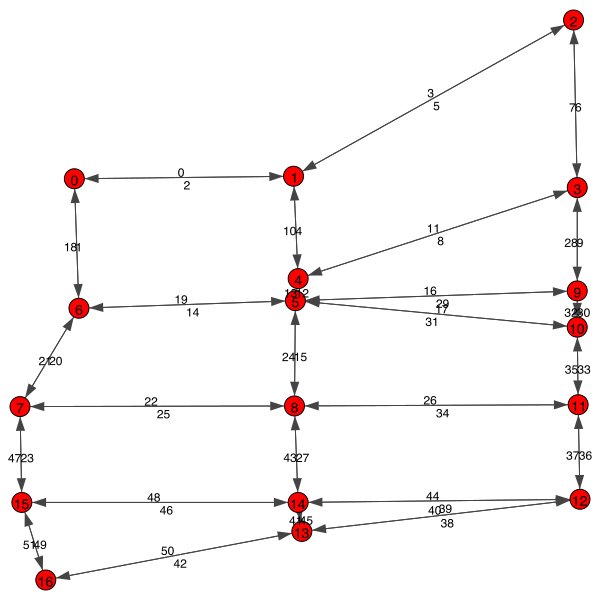

In [16]:
import igraph as ig
import matplotlib.pyplot as plt

# Assuming g is your igraph graph
g = env.graph

# Specify node locations
node_positions = [(v['position_x'], -v['position_y']) for v in g.vs]

num_nodes = len(g.vs)
num_edges = len(g.es)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Plot the graph using igraph
layout = ig.Layout(node_positions)
g.es["curved"] = False
ig.plot(g, layout=layout, vertex_label=g.vs["id"], edge_label=g.es["id"])

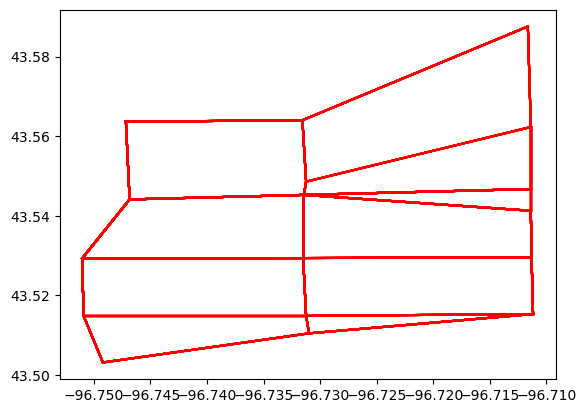

In [17]:
# get shortest paths for each OD pair
shortest_paths = []
for o, row in od_df.iterrows():
    source = int(o - 1)
    for d, volume in enumerate(row):
        target = int(d)
        path = g.get_shortest_paths(source, to=target, weights=g.es["distance"], mode="OUT", output="vpath")
        shortest_paths.append(path)

# plot the shortest paths
for path in shortest_paths:
    for i in range(len(path[0]) - 1):
        source = path[0][i]
        target = path[0][i+1]
        x = [g.vs[source]['position_x'], g.vs[target]['position_x']]
        y = [g.vs[source]['position_y'], g.vs[target]['position_y']]
        plt.plot(x, y, 'r-')

In [18]:
print(env.get_count_redundancies_summary())

Summary | Network Trips

Total number of trips: 101

O: 0, D: 1 | # paths: 159
O: 0, D: 8 | # paths: 183
O: 0, D: 11 | # paths: 161
O: 1, D: 0 | # paths: 159
O: 1, D: 2 | # paths: 102
O: 1, D: 4 | # paths: 102
O: 1, D: 5 | # paths: 86
O: 1, D: 6 | # paths: 159
O: 1, D: 7 | # paths: 192
O: 1, D: 9 | # paths: 112
O: 1, D: 11 | # paths: 156
O: 1, D: 15 | # paths: 240
O: 2, D: 1 | # paths: 102
O: 2, D: 5 | # paths: 128
O: 2, D: 9 | # paths: 160
O: 2, D: 13 | # paths: 334
O: 2, D: 15 | # paths: 303
O: 3, D: 2 | # paths: 102
O: 3, D: 7 | # paths: 174
O: 3, D: 9 | # paths: 139
O: 3, D: 12 | # paths: 228
O: 3, D: 13 | # paths: 258
O: 3, D: 16 | # paths: 298
O: 4, D: 0 | # paths: 150
O: 4, D: 1 | # paths: 102
O: 4, D: 6 | # paths: 139
O: 4, D: 10 | # paths: 157
O: 4, D: 13 | # paths: 295
O: 4, D: 14 | # paths: 239
O: 5, D: 3 | # paths: 96
O: 5, D: 9 | # paths: 85
O: 5, D: 12 | # paths: 140
O: 5, D: 16 | # paths: 179
O: 6, D: 1 | # paths: 159
O: 6, D: 2 | # paths: 170
O: 6, D: 3 | # paths: 122
O

In [19]:
print(env.get_edge_traffic_summary())

Summary | Edge Traffic

Edge    Volume (%)    Travel Time
------------------------------
  0   2673.520(15.0%)      2.00      
  1   1935.287(39.4%)      6.02      
  2   2517.644(14.2%)      2.00      
  3   2448.069(49.5%)      4.04      
  4   2594.109(25.9%)      5.00      
  5   1751.936(35.4%)      4.01      
  6   2679.411(54.7%)      2.03      
  7   1983.278(40.5%)      2.01      
  8   199.105(3.9%)      10.00     
  9   5071.500(100.5%)      5.77      
 10   1734.365(17.3%)      5.00      
 11   606.355(12.0%)      10.00     
 12   5293.213(38.0%)      3.01      
 13   3040.721(21.9%)      3.00      
 14   1955.876(19.6%)      5.00      
 15   5695.397(42.2%)      6.03      
 16   7349.593(151.4%)      7.15      
 17   1193.466(23.9%)      8.00      
 18   2291.163(46.7%)      6.04      
 19   4980.313(49.8%)      5.05      
 20   5191.163(106.5%)      4.77      
 21   4771.477(97.8%)      4.55      
 22   2355.393(45.9%)      5.03      
 23   3986.707(81.0%)      4.26      

In [20]:
from imp_act import make, Recorder, RolloutPlotter

In [21]:
recorded_env = Recorder(env)

# record rollouts
for ep in range(10):

    obs = recorded_env.reset()
    done = False
    while not done:

        actions = [[0] * len(e["road_edge"].segments) for e in env.graph.es]

        obs, reward, done, info = recorded_env.step(actions)

/Users/pbhustali/Documents/GitHub/imp-act/imp_act/environments/rollout_plotter.py:227: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


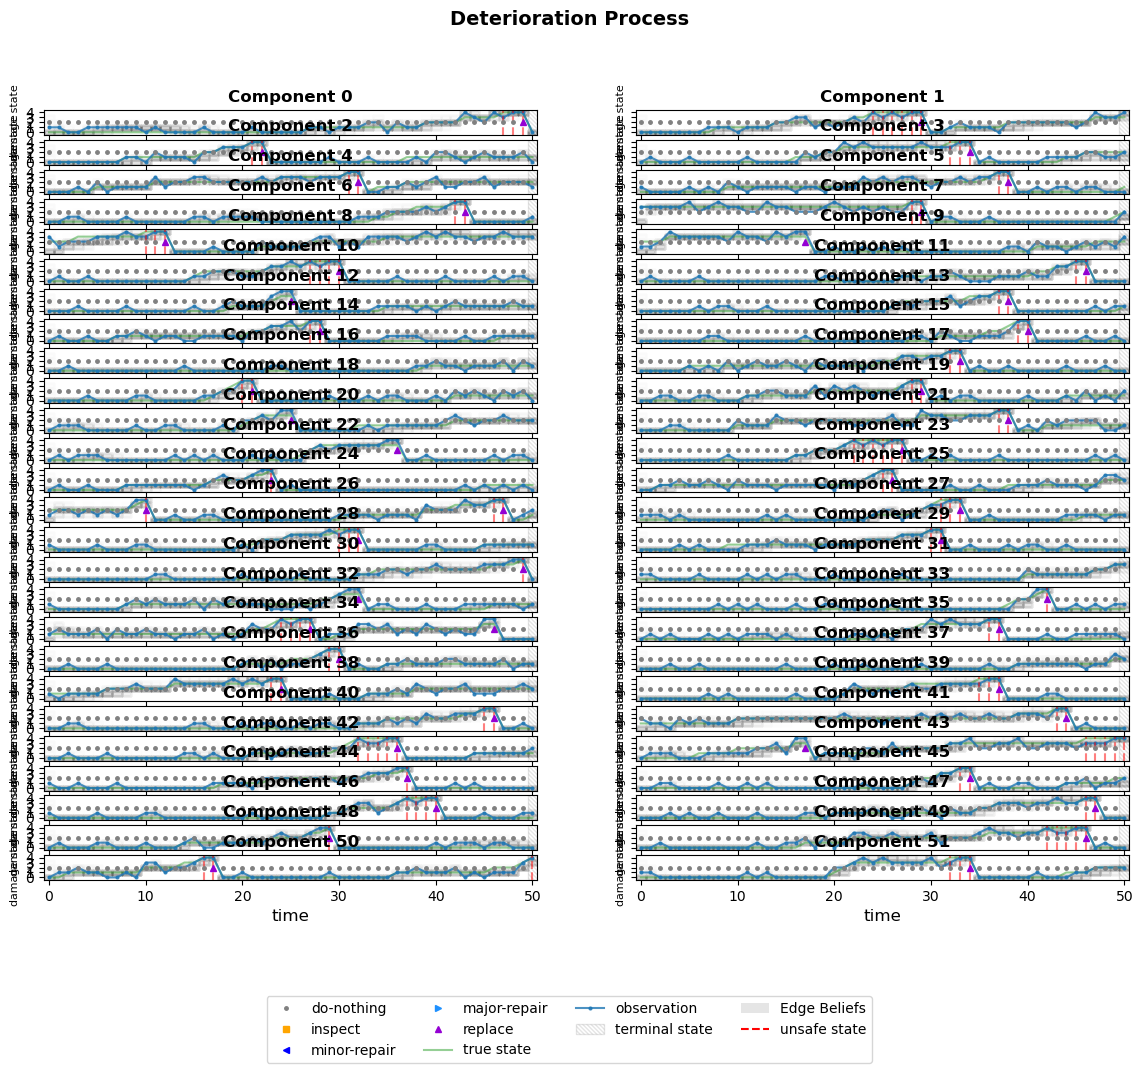

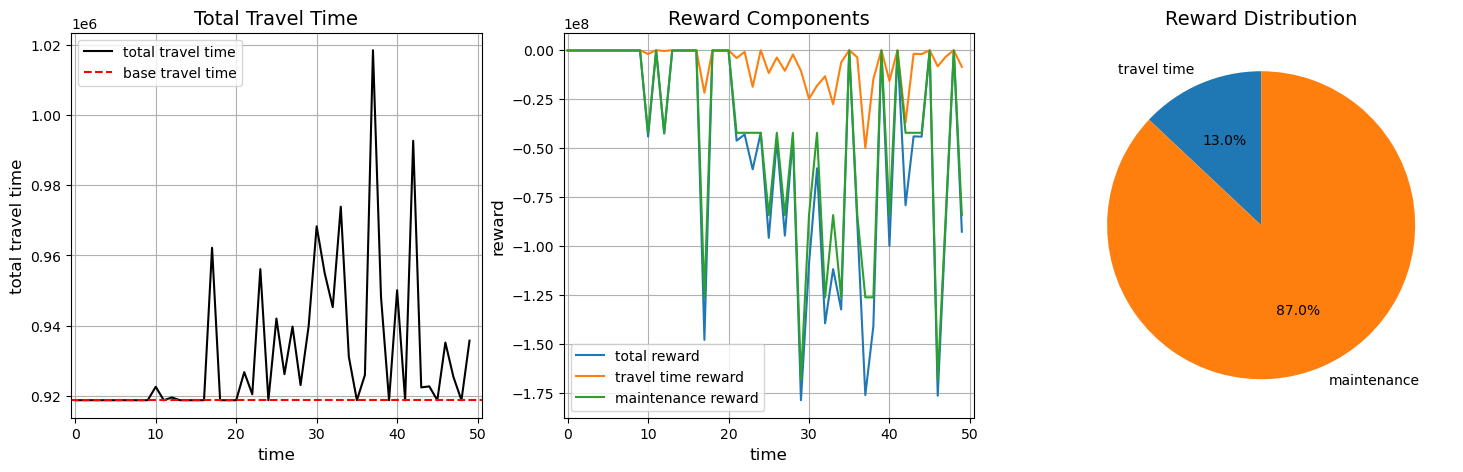

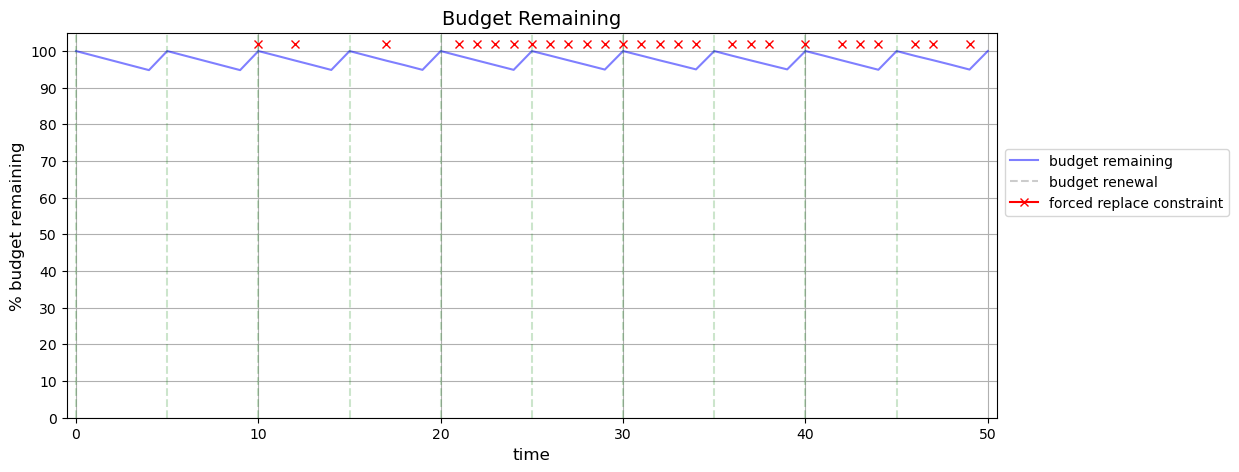

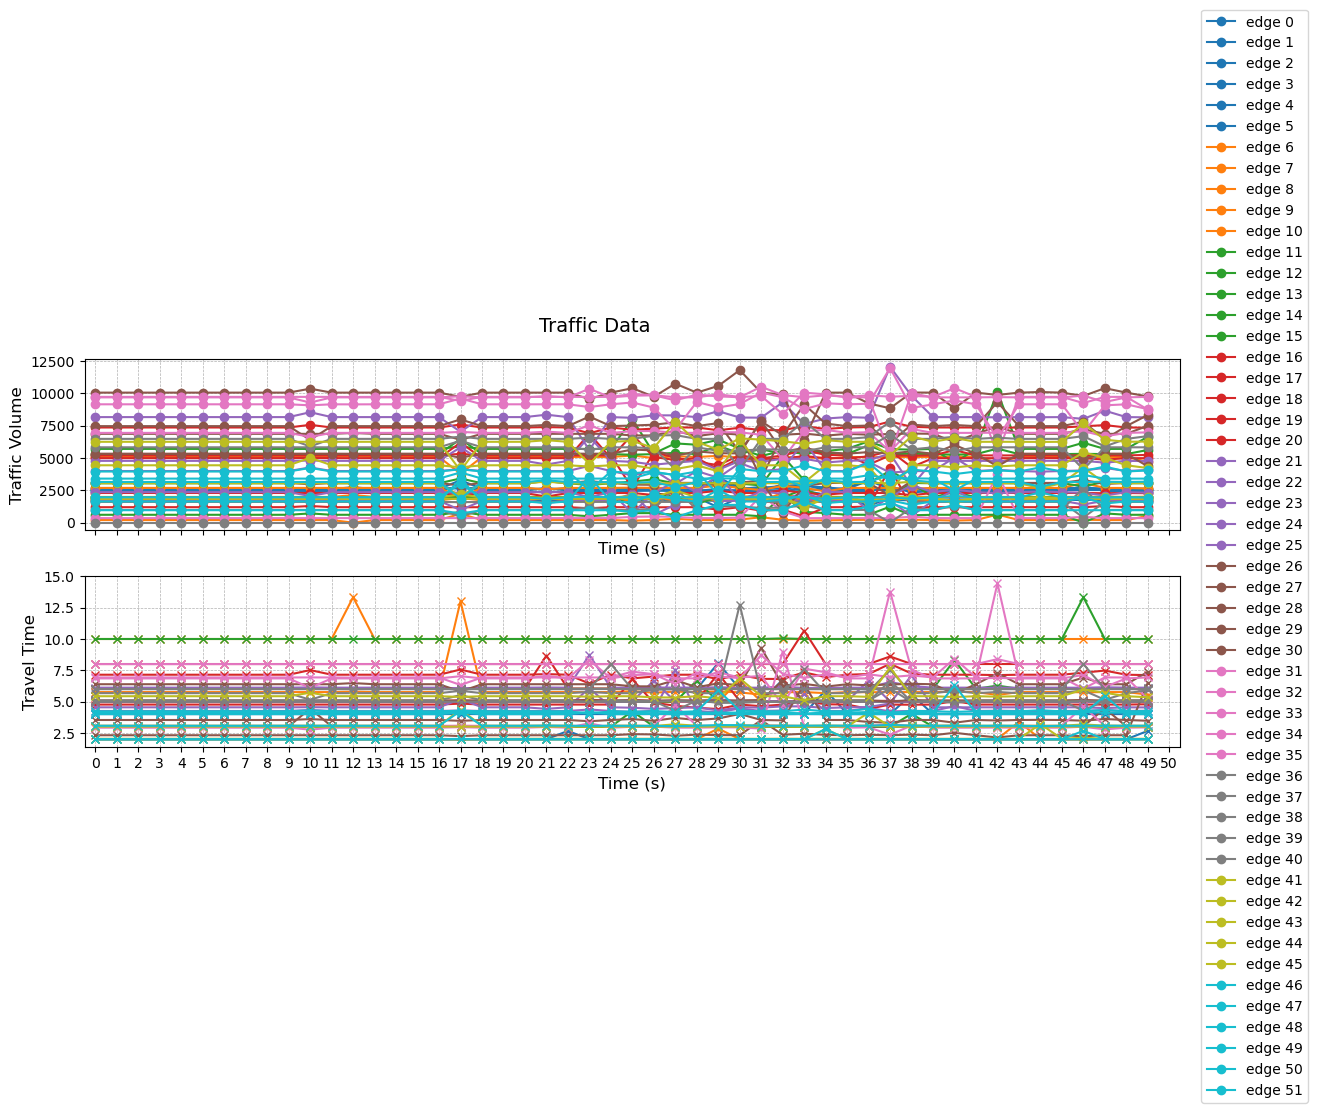

In [22]:
rollout_data = recorded_env.rollout_data

plotter = RolloutPlotter(env)

ep = 5 # episode to plot
plotter.plot(episode_data=rollout_data[ep])